In [0]:
# {0: 'Camera',
#  1: 'Selection',
#  2: 'Ability',
#  3: 'Right Click',
#  4: 'SetControlGroup',
#  5: 'GetControlGroup',
#  6: 'AddToControlGroup',
#  7: 'ControlGroup'}

In [0]:
# event
##1) Ability : 생산, 공격 등 선수의 주요 행동

##2) AddToControlGroup : 부대에 추가

##3) Camera : 시점 선택

##4) ControlGroup : 부대 행동

##5) GetControlGroup : 부대 불러오기

##6) Right Click : 마우스 우클릭

##7) Selection : 객체 선택

##8) SetControlGroup : 부대 지정


# event unique values : ['Camera' 'Selection' 'Ability' 'Right Click' 'SetControlGroup'
#  'GetControlGroup' 'AddToControlGroup' 'ControlGroup']
# species unique values : ['T' 'P' 'Z']

# 데이터 준비 
- event 행동종류 count와 종족에 대한 데이터
- P0 :player , P1: player , delta : 플레이어 간의 행동종류 차이 값  
-  게임 버전은 3.16.1 이며 확장팩은 공허의 유산 (3.16.1은 2017.08 패치)


In [0]:
import os
os.chdir('/content/drive/My Drive/kaggle_study/dacon_star')

In [30]:
import pandas as pd

train = pd.read_csv('xy_train.csv',index_col='game_id')

print(train.shape)
train.head()

(38872, 27)


,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,444.0,50.0,34.0,35.0,3.0,24.0,2.0,0.0,0.0,425.0,57.0,34.0,28.0,1.0,3.0,0.0,0.0,19.0,-7.0,0.0,7.0,2.0,21.0,2.0,0.0,1.0
1.0,1.0,627.0,186.0,77.0,160.0,10.0,162.0,1.0,0.0,0.0,858.0,116.0,67.0,131.0,8.0,31.0,0.0,0.0,-231.0,70.0,10.0,29.0,2.0,131.0,1.0,0.0,1.0
2.0,1.0,413.0,90.0,69.0,160.0,14.0,99.0,6.0,0.0,2.0,725.0,232.0,85.0,204.0,9.0,109.0,5.0,2.0,-312.0,-142.0,-16.0,-44.0,5.0,-10.0,1.0,-2.0,0.0
3.0,0.0,713.0,180.0,82.0,276.0,6.0,132.0,0.0,0.0,1.0,388.0,148.0,89.0,268.0,19.0,710.0,0.0,0.0,325.0,32.0,-7.0,8.0,-13.0,-578.0,0.0,0.0,0.0
4.0,0.0,430.0,67.0,57.0,177.0,10.0,224.0,1.0,0.0,2.0,272.0,126.0,36.0,106.0,8.0,99.0,4.0,0.0,158.0,-59.0,21.0,71.0,2.0,125.0,-3.0,0.0,0.0


In [31]:
train.index

Float64Index([    0.0,     1.0,     2.0,     3.0,     4.0,     5.0,     6.0,
                  7.0,     8.0,     9.0,
              ...
              38862.0, 38863.0, 38864.0, 38865.0, 38866.0, 38867.0, 38868.0,
              38869.0, 38870.0, 38871.0],
             dtype='float64', name='game_id', length=38872)

In [32]:
test = pd.read_csv('x_test.csv',index_col='game_id')
print(test.shape)
test.head()

(16787, 26)


,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,
38872.0,0.0,232.0,52.0,31.0,1.0,5.0,241.0,9.0,0.0,0.0,467.0,41.0,38.0,4.0,0.0,122.0,43.0,0.0,-235.0,11.0,-7.0,-3.0,5.0,119.0,-34.0,0.0
38873.0,1.0,200.0,114.0,34.0,0.0,0.0,51.0,18.0,4.0,0.0,146.0,19.0,28.0,1.0,5.0,68.0,122.0,0.0,54.0,95.0,6.0,-1.0,-5.0,-17.0,-104.0,4.0
38874.0,2.0,245.0,42.0,33.0,0.0,7.0,79.0,63.0,0.0,2.0,220.0,36.0,29.0,0.0,5.0,108.0,426.0,0.0,25.0,6.0,4.0,0.0,2.0,-29.0,-363.0,0.0
38875.0,2.0,515.0,123.0,95.0,8.0,9.0,218.0,255.0,0.0,0.0,357.0,99.0,58.0,1.0,2.0,322.0,24.0,0.0,158.0,24.0,37.0,7.0,7.0,-104.0,231.0,0.0
38876.0,1.0,129.0,25.0,7.0,2.0,2.0,30.0,387.0,0.0,1.0,161.0,35.0,8.0,0.0,1.0,7.0,1.0,0.0,-32.0,-10.0,-1.0,2.0,1.0,23.0,386.0,0.0


In [33]:
test.index

Float64Index([38872.0, 38873.0, 38874.0, 38875.0, 38876.0, 38877.0, 38878.0,
              38879.0, 38880.0, 38881.0,
              ...
              55649.0, 55650.0, 55651.0, 55652.0, 55653.0, 55654.0, 55655.0,
              55656.0, 55657.0, 55658.0],
             dtype='float64', name='game_id', length=16787)

# EDA

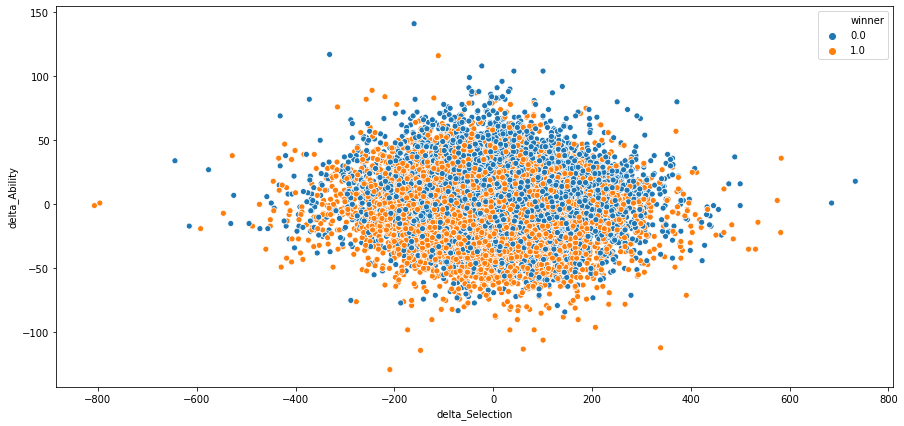

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
sns.scatterplot(data=train,x='delta_Selection',y= 'delta_Ability',hue='winner')

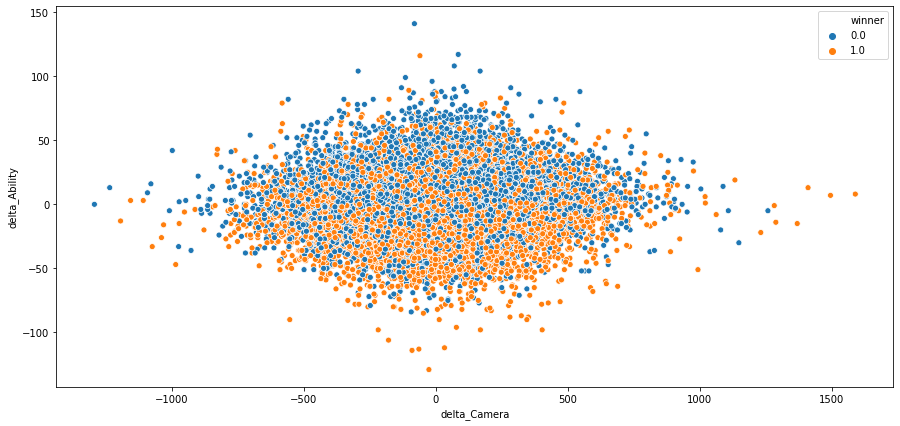

In [19]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=train,x='delta_Camera',y= 'delta_Ability',hue='winner' )

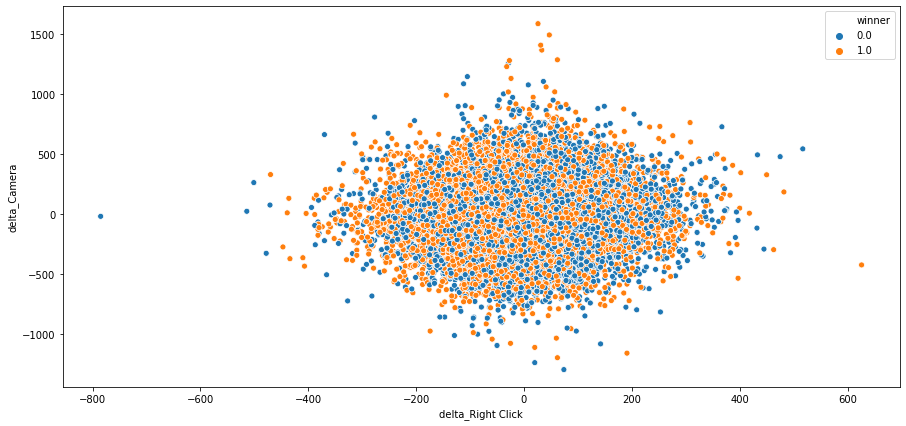

In [20]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=train,x='delta_Right Click',y= 'delta_Camera',hue='winner' )

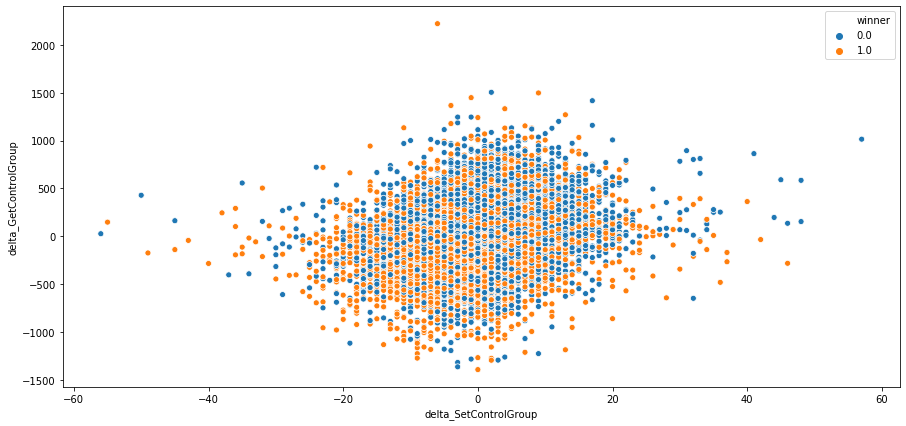

In [21]:
a= train[(train['delta_SetControlGroup'] <20) & (train['delta_SetControlGroup'] >-20) ]
plt.figure(figsize=(15,7))
sns.scatterplot(data=train,x='delta_SetControlGroup',y= 'delta_GetControlGroup',hue='winner' )

In [24]:
train.loc[(train['delta_SetControlGroup']>0) & (train['delta_GetControlGroup']<0),'winner'].value_counts()

1.0    3096
0.0    2815
Name: winner, dtype: int64

In [27]:
train.loc[ (train['delta_GetControlGroup']<0),'winner'].value_counts()

1.0    10666
0.0     8145
Name: winner, dtype: int64

In [28]:
# 부대 불러오기 값 0 일때 플레이어 승리 수
train.loc[ (train['delta_GetControlGroup']==0),'winner'].value_counts()

1.0    662
0.0    653
Name: winner, dtype: int64


- 어빌리티가 높았을 때, 승리했을 경우가 많다  
- 셀렉션은 큰 영향을 끼치지 않는 것 같다.
- 카메라는 큰 영향을 끼치지 않는 것 같다.
- 부대 불러오기도 승리한 플레이어가 높은 값을 가진다.

---



In [0]:
train.loc[train['delta_Camera'] <0,'winner'].value_counts()

0.0    9657
1.0    9585
Name: winner, dtype: int64

In [0]:
# 어빌리티가 0일때, 플레이어 승리 수
train.loc[train['delta_Ability'] == 0, 'winner'].value_counts()

1.0    772
0.0    762
Name: winner, dtype: int64

In [0]:
train['neg_ab'] =  (train['delta_Ability'] <0).astype(int) 
train['pos_ab'] = (train['delta_Ability'] >0).astype(int)

test['neg_ab'] =  (test['delta_Ability'] <0).astype(int) 
test['pos_ab'] = (test['delta_Ability'] >0).astype(int)

In [0]:
train.head()

,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,neg_ab,pos_ab
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,444.0,50.0,34.0,35.0,3.0,24.0,2.0,0.0,0.0,425.0,57.0,34.0,28.0,1.0,3.0,0.0,0.0,19.0,-7.0,0.0,7.0,2.0,21.0,2.0,0.0,1.0,0,0
1.0,1.0,627.0,186.0,77.0,160.0,10.0,162.0,1.0,0.0,0.0,858.0,116.0,67.0,131.0,8.0,31.0,0.0,0.0,-231.0,70.0,10.0,29.0,2.0,131.0,1.0,0.0,1.0,0,1
2.0,1.0,413.0,90.0,69.0,160.0,14.0,99.0,6.0,0.0,2.0,725.0,232.0,85.0,204.0,9.0,109.0,5.0,2.0,-312.0,-142.0,-16.0,-44.0,5.0,-10.0,1.0,-2.0,0.0,1,0
3.0,0.0,713.0,180.0,82.0,276.0,6.0,132.0,0.0,0.0,1.0,388.0,148.0,89.0,268.0,19.0,710.0,0.0,0.0,325.0,32.0,-7.0,8.0,-13.0,-578.0,0.0,0.0,0.0,1,0
4.0,0.0,430.0,67.0,57.0,177.0,10.0,224.0,1.0,0.0,2.0,272.0,126.0,36.0,106.0,8.0,99.0,4.0,0.0,158.0,-59.0,21.0,71.0,2.0,125.0,-3.0,0.0,0.0,0,1


In [0]:
test.head()

,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,P0_sp_0.0,P0_sp_1.0,P0_sp_2.0,P1_sp_0.0,P1_sp_1.0,P1_sp_2.0,neg_ab,pos_ab
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
38872.0,0.0,232.0,52.0,31.0,1.0,5.0,241.0,9.0,0.0,0.0,467.0,41.0,38.0,4.0,0.0,122.0,43.0,0.0,-235.0,11.0,-7.0,-3.0,5.0,119.0,-34.0,0.0,1,0,0,1,0,0,1,0
38873.0,1.0,200.0,114.0,34.0,0.0,0.0,51.0,18.0,4.0,0.0,146.0,19.0,28.0,1.0,5.0,68.0,122.0,0.0,54.0,95.0,6.0,-1.0,-5.0,-17.0,-104.0,4.0,0,1,0,1,0,0,0,1
38874.0,2.0,245.0,42.0,33.0,0.0,7.0,79.0,63.0,0.0,2.0,220.0,36.0,29.0,0.0,5.0,108.0,426.0,0.0,25.0,6.0,4.0,0.0,2.0,-29.0,-363.0,0.0,0,0,1,0,0,1,0,1
38875.0,2.0,515.0,123.0,95.0,8.0,9.0,218.0,255.0,0.0,0.0,357.0,99.0,58.0,1.0,2.0,322.0,24.0,0.0,158.0,24.0,37.0,7.0,7.0,-104.0,231.0,0.0,0,0,1,1,0,0,0,1
38876.0,1.0,129.0,25.0,7.0,2.0,2.0,30.0,387.0,0.0,1.0,161.0,35.0,8.0,0.0,1.0,7.0,1.0,0.0,-32.0,-10.0,-1.0,2.0,1.0,23.0,386.0,0.0,0,1,0,0,1,0,1,0


- 종족간의 상성

T VS P

In [0]:
tp= (train['P0_species'] == 0) & (train['P1_species'] ==1) | (train['P0_species'] == 1) & (train['P1_species'] ==0)
t_tp = (test['P0_species'] == 0) & (test['P1_species'] ==1) | (test['P0_species'] == 1) & (test['P1_species'] ==0)

train[tp]

,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,pz,tp,tz,P1_sp_0.0,P1_sp_1.0,P1_sp_2.0,P0_sp_0.0,P0_sp_1.0,P0_sp_2.0
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,627.0,186.0,77.0,160.0,10.0,162.0,1.0,0.0,0.0,858.0,116.0,67.0,131.0,8.0,31.0,0.0,0.0,-231.0,70.0,10.0,29.0,2.0,131.0,1.0,0.0,1.0,0,1,0,1,0,0,0,1,0
3.0,0.0,713.0,180.0,82.0,276.0,6.0,132.0,0.0,0.0,1.0,388.0,148.0,89.0,268.0,19.0,710.0,0.0,0.0,325.0,32.0,-7.0,8.0,-13.0,-578.0,0.0,0.0,0.0,0,1,0,0,1,0,1,0,0
6.0,1.0,324.0,76.0,39.0,131.0,12.0,27.0,0.0,0.0,0.0,265.0,155.0,55.0,141.0,4.0,842.0,5.0,0.0,59.0,-79.0,-16.0,-10.0,8.0,-815.0,-5.0,0.0,1.0,0,1,0,1,0,0,0,1,0
10.0,1.0,477.0,189.0,79.0,218.0,4.0,52.0,0.0,0.0,0.0,551.0,104.0,84.0,156.0,1.0,566.0,3.0,0.0,-74.0,85.0,-5.0,62.0,3.0,-514.0,-3.0,0.0,0.0,0,1,0,1,0,0,0,1,0
16.0,0.0,855.0,85.0,42.0,159.0,0.0,8.0,6.0,0.0,1.0,523.0,91.0,64.0,409.0,1.0,138.0,10.0,0.0,332.0,-6.0,-22.0,-250.0,-1.0,-130.0,-4.0,0.0,0.0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38860.0,1.0,130.0,33.0,17.0,55.0,5.0,28.0,0.0,0.0,0.0,388.0,17.0,11.0,11.0,0.0,0.0,0.0,0.0,-258.0,16.0,6.0,44.0,5.0,28.0,0.0,0.0,0.0,0,1,0,1,0,0,0,1,0
38861.0,0.0,147.0,61.0,21.0,79.0,2.0,1.0,0.0,0.0,1.0,225.0,57.0,31.0,28.0,1.0,0.0,0.0,0.0,-78.0,4.0,-10.0,51.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,1,0,1,0,0
38863.0,1.0,211.0,107.0,39.0,149.0,5.0,118.0,1.0,0.0,0.0,318.0,49.0,31.0,81.0,5.0,33.0,0.0,0.0,-107.0,58.0,8.0,68.0,0.0,85.0,1.0,0.0,0.0,0,1,0,1,0,0,0,1,0


In [0]:
tp_vc = train[tp].groupby(['P0_species','P1_species']).winner.value_counts()
tp_vc

P0_species  P1_species  winner
0.0         1.0         1.0       2178
                        0.0       2130
1.0         0.0         1.0       2205
                        0.0       2178
Name: winner, dtype: int64

In [0]:
# 테프전 테란 승률
4335/tp_vc.sum() 

0.4987918536416983

In [0]:
# 테프전 프로토스 승률
4356/tp_vc.sum()

0.5012081463583017

T vs Z

In [0]:
tz= (train['P0_species']==0) & (train['P1_species']==2) | (train['P0_species']==2) & (train['P1_species']==0)
t_tz= (test['P0_species']==0) & (test['P1_species']==2) | (test['P0_species']==2) & (test['P1_species']==0)
train[tz]

,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,pz,tp,tz,P1_sp_0.0,P1_sp_1.0,P1_sp_2.0,P0_sp_0.0,P0_sp_1.0,P0_sp_2.0
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.0,0.0,430.0,67.0,57.0,177.0,10.0,224.0,1.0,0.0,2.0,272.0,126.0,36.0,106.0,8.0,99.0,4.0,0.0,158.0,-59.0,21.0,71.0,2.0,125.0,-3.0,0.0,0.0,0,0,1,0,0,1,1,0,0
8.0,0.0,327.0,63.0,45.0,35.0,0.0,13.0,4.0,0.0,2.0,236.0,177.0,52.0,39.0,1.0,15.0,3.0,0.0,91.0,-114.0,-7.0,-4.0,-1.0,-2.0,1.0,0.0,1.0,0,0,1,0,0,1,1,0,0
11.0,2.0,804.0,120.0,42.0,139.0,0.0,25.0,5.0,0.0,0.0,491.0,98.0,54.0,52.0,0.0,0.0,0.0,0.0,313.0,22.0,-12.0,87.0,0.0,25.0,5.0,0.0,1.0,0,0,1,1,0,0,0,0,1
12.0,0.0,419.0,78.0,37.0,73.0,14.0,5.0,0.0,0.0,2.0,198.0,132.0,39.0,79.0,2.0,82.0,1.0,0.0,221.0,-54.0,-2.0,-6.0,12.0,-77.0,-1.0,0.0,1.0,0,0,1,0,0,1,1,0,0
19.0,0.0,769.0,104.0,86.0,246.0,14.0,306.0,1.0,0.0,2.0,543.0,272.0,78.0,190.0,4.0,333.0,3.0,0.0,226.0,-168.0,8.0,56.0,10.0,-27.0,-2.0,0.0,1.0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38855.0,2.0,850.0,237.0,89.0,134.0,0.0,6.0,2.0,0.0,0.0,444.0,252.0,80.0,291.0,6.0,795.0,9.0,0.0,406.0,-15.0,9.0,-157.0,-6.0,-789.0,-7.0,0.0,0.0,0,0,1,1,0,0,0,0,1
38856.0,0.0,317.0,122.0,45.0,128.0,6.0,68.0,2.0,0.0,2.0,706.0,77.0,29.0,79.0,3.0,28.0,0.0,0.0,-389.0,45.0,16.0,49.0,3.0,40.0,2.0,0.0,1.0,0,0,1,0,0,1,1,0,0
38858.0,0.0,649.0,250.0,98.0,152.0,7.0,46.0,3.0,0.0,2.0,213.0,302.0,76.0,206.0,9.0,123.0,9.0,0.0,436.0,-52.0,22.0,-54.0,-2.0,-77.0,-6.0,0.0,1.0,0,0,1,0,0,1,1,0,0


In [0]:
tz_vc = train[tz].groupby(['P0_species','P1_species']).winner.value_counts()
tz_vc

P0_species  P1_species  winner
0.0         2.0         0.0       2583
                        1.0       2529
2.0         0.0         0.0       2692
                        1.0       2504
Name: winner, dtype: int64

In [0]:
# 테저전 테란 승률
(2583+2504)/tz_vc.sum()

0.493500194024059

In [0]:
# 테저전 저그 승률
(2529+2692)/tz_vc.sum()

0.506499805975941

T VS T


In [0]:
tt= (train['P0_species']==0) & (train['P1_species']==0)
train[tt]

,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,444.0,50.0,34.0,35.0,3.0,24.0,2.0,0.0,0.0,425.0,57.0,34.0,28.0,1.0,3.0,0.0,0.0,19.0,-7.0,0.0,7.0,2.0,21.0,2.0,0.0,1.0
15.0,0.0,81.0,64.0,23.0,39.0,8.0,156.0,2.0,0.0,0.0,338.0,44.0,20.0,98.0,4.0,20.0,0.0,0.0,-257.0,20.0,3.0,-59.0,4.0,136.0,2.0,0.0,0.0
29.0,0.0,252.0,231.0,66.0,200.0,3.0,492.0,0.0,0.0,0.0,252.0,127.0,73.0,242.0,17.0,82.0,3.0,0.0,0.0,104.0,-7.0,-42.0,-14.0,410.0,-3.0,0.0,0.0
39.0,0.0,261.0,57.0,15.0,129.0,4.0,190.0,0.0,0.0,0.0,238.0,46.0,25.0,76.0,6.0,89.0,0.0,0.0,23.0,11.0,-10.0,53.0,-2.0,101.0,0.0,0.0,0.0
42.0,0.0,760.0,68.0,52.0,53.0,6.0,37.0,0.0,0.0,0.0,524.0,62.0,30.0,33.0,0.0,0.0,0.0,0.0,236.0,6.0,22.0,20.0,6.0,37.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38827.0,0.0,68.0,11.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,46.0,40.0,6.0,12.0,3.0,155.0,0.0,0.0,22.0,-29.0,0.0,-6.0,-3.0,-155.0,0.0,0.0,0.0
38842.0,0.0,154.0,18.0,25.0,41.0,3.0,24.0,0.0,0.0,0.0,109.0,135.0,25.0,159.0,3.0,202.0,0.0,0.0,45.0,-117.0,0.0,-118.0,0.0,-178.0,0.0,0.0,0.0
38845.0,0.0,145.0,185.0,23.0,110.0,5.0,143.0,0.0,0.0,0.0,173.0,32.0,21.0,94.0,3.0,4.0,0.0,0.0,-28.0,153.0,2.0,16.0,2.0,139.0,0.0,0.0,1.0


In [0]:
train.loc[tt,'winner'].value_counts()

1.0    2913
0.0    2754
Name: winner, dtype: int64

P VS Z

In [0]:
pz= (train['P0_species']==1) & (train['P1_species']==2) | (train['P0_species']==2) & (train['P1_species']==1)
t_pz= (test['P0_species']==1) & (test['P1_species']==2) | (test['P0_species']==2) & (test['P1_species']==1)
train[pz]

,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,pz,tp,tz,P1_sp_0.0,P1_sp_1.0,P1_sp_2.0,P0_sp_0.0,P0_sp_1.0,P0_sp_2.0
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.0,1.0,413.0,90.0,69.0,160.0,14.0,99.0,6.0,0.0,2.0,725.0,232.0,85.0,204.0,9.0,109.0,5.0,2.0,-312.0,-142.0,-16.0,-44.0,5.0,-10.0,1.0,-2.0,0.0,1,0,0,0,0,1,0,1,0
7.0,2.0,315.0,148.0,53.0,79.0,17.0,43.0,0.0,0.0,1.0,508.0,87.0,64.0,303.0,5.0,192.0,6.0,0.0,-193.0,61.0,-11.0,-224.0,12.0,-149.0,-6.0,0.0,0.0,1,0,0,0,1,0,0,0,1
9.0,1.0,171.0,139.0,18.0,108.0,2.0,111.0,3.0,0.0,2.0,246.0,51.0,19.0,36.0,0.0,17.0,5.0,0.0,-75.0,88.0,-1.0,72.0,2.0,94.0,-2.0,0.0,1.0,1,0,0,0,0,1,0,1,0
13.0,1.0,621.0,85.0,49.0,219.0,4.0,19.0,4.0,0.0,2.0,899.0,197.0,51.0,127.0,0.0,25.0,2.0,0.0,-278.0,-112.0,-2.0,92.0,4.0,-6.0,2.0,0.0,1.0,1,0,0,0,0,1,0,1,0
21.0,2.0,657.0,182.0,64.0,228.0,2.0,54.0,0.0,0.0,1.0,935.0,78.0,69.0,155.0,0.0,12.0,1.0,0.0,-278.0,104.0,-5.0,73.0,2.0,42.0,-1.0,0.0,1.0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38853.0,1.0,609.0,61.0,47.0,62.0,1.0,31.0,0.0,0.0,2.0,622.0,145.0,41.0,54.0,3.0,43.0,0.0,0.0,-13.0,-84.0,6.0,8.0,-2.0,-12.0,0.0,0.0,1.0,1,0,0,0,0,1,0,1,0
38857.0,1.0,309.0,47.0,18.0,48.0,2.0,2.0,0.0,0.0,2.0,30.0,73.0,25.0,11.0,0.0,0.0,0.0,0.0,279.0,-26.0,-7.0,37.0,2.0,2.0,0.0,0.0,0.0,1,0,0,0,0,1,0,1,0
38859.0,2.0,420.0,214.0,58.0,277.0,10.0,394.0,5.0,0.0,1.0,419.0,91.0,93.0,252.0,9.0,67.0,0.0,0.0,1.0,123.0,-35.0,25.0,1.0,327.0,5.0,0.0,0.0,1,0,0,0,1,0,0,0,1


In [0]:
pz_vc = train[pz].groupby(['P0_species','P1_species']).winner.value_counts()
pz_vc

P0_species  P1_species  winner
1.0         2.0         1.0       1841
                        0.0       1707
2.0         1.0         0.0       1861
                        1.0       1820
Name: winner, dtype: int64

In [0]:
pvsz= pd.concat([pz])

In [0]:
# 프저전 프로토스 승률
(1707+1820)/pz_vc.sum()

0.4878959745469636

In [0]:
# 프저전 저그 승률
(1841+1861)/pz_vc.sum()

0.5121040254530363

- 프저전은 저그가 상당히 우세하다

P VS P 

In [0]:
pp = (train['P0_species']==1) & (train['P1_species']==1)
train[pp]

,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,pz
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5.0,1.0,210.0,138.0,66.0,337.0,3.0,21.0,0.0,0.0,1.0,687.0,62.0,51.0,77.0,0.0,0.0,0.0,0.0,-477.0,76.0,15.0,260.0,3.0,21.0,0.0,0.0,0.0,0
14.0,1.0,288.0,36.0,18.0,86.0,2.0,3.0,1.0,0.0,1.0,262.0,91.0,24.0,111.0,5.0,322.0,0.0,0.0,26.0,-55.0,-6.0,-25.0,-3.0,-319.0,1.0,0.0,1.0,0
27.0,1.0,110.0,60.0,27.0,151.0,7.0,54.0,0.0,0.0,1.0,95.0,28.0,23.0,44.0,4.0,2.0,0.0,0.0,15.0,32.0,4.0,107.0,3.0,52.0,0.0,0.0,1.0,0
52.0,1.0,301.0,45.0,38.0,65.0,0.0,20.0,6.0,0.0,1.0,403.0,67.0,36.0,119.0,1.0,71.0,7.0,0.0,-102.0,-22.0,2.0,-54.0,-1.0,-51.0,-1.0,0.0,1.0,0
58.0,1.0,372.0,102.0,34.0,167.0,2.0,12.0,0.0,0.0,1.0,359.0,45.0,46.0,84.0,5.0,72.0,0.0,0.0,13.0,57.0,-12.0,83.0,-3.0,-60.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38838.0,1.0,527.0,184.0,47.0,236.0,8.0,474.0,5.0,0.0,1.0,536.0,65.0,45.0,97.0,1.0,28.0,4.0,0.0,-9.0,119.0,2.0,139.0,7.0,446.0,1.0,0.0,0.0,0
38848.0,1.0,247.0,65.0,75.0,212.0,13.0,149.0,5.0,0.0,1.0,200.0,326.0,59.0,189.0,12.0,564.0,0.0,0.0,47.0,-261.0,16.0,23.0,1.0,-415.0,5.0,0.0,1.0,0
38852.0,1.0,217.0,64.0,28.0,222.0,2.0,8.0,0.0,0.0,1.0,110.0,17.0,20.0,45.0,6.0,17.0,0.0,0.0,107.0,47.0,8.0,177.0,-4.0,-9.0,0.0,0.0,1.0,0


In [0]:
train.loc[pp,'winner'].value_counts()

1.0    1537
0.0    1415
Name: winner, dtype: int64

In [0]:
train.loc[tt,'winner'].value_counts()

1.0    2913
0.0    2754
Name: winner, dtype: int64

Z VS Z

In [0]:
zz = (train['P0_species']==2) & (train['P1_species']==2)
train[zz]

,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,pz
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18.0,2.0,228.0,103.0,26.0,68.0,5.0,47.0,0.0,0.0,2.0,82.0,95.0,42.0,126.0,7.0,41.0,0.0,0.0,146.0,8.0,-16.0,-58.0,-2.0,6.0,0.0,0.0,1.0,0
32.0,2.0,28.0,87.0,10.0,28.0,2.0,112.0,1.0,0.0,2.0,12.0,29.0,6.0,44.0,0.0,122.0,3.0,0.0,16.0,58.0,4.0,-16.0,2.0,-10.0,-2.0,0.0,1.0,0
33.0,2.0,105.0,88.0,14.0,98.0,7.0,183.0,1.0,0.0,2.0,78.0,92.0,15.0,31.0,1.0,305.0,4.0,0.0,27.0,-4.0,-1.0,67.0,6.0,-122.0,-3.0,0.0,0.0,0
46.0,2.0,513.0,136.0,46.0,61.0,3.0,63.0,0.0,0.0,2.0,364.0,226.0,45.0,184.0,10.0,125.0,1.0,0.0,149.0,-90.0,1.0,-123.0,-7.0,-62.0,-1.0,0.0,1.0,0
49.0,2.0,131.0,35.0,7.0,34.0,6.0,6.0,0.0,0.0,2.0,156.0,27.0,12.0,15.0,2.0,375.0,2.0,0.0,-25.0,8.0,-5.0,19.0,4.0,-369.0,-2.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38807.0,2.0,39.0,31.0,7.0,5.0,1.0,0.0,0.0,0.0,2.0,50.0,84.0,10.0,14.0,1.0,125.0,2.0,0.0,-11.0,-53.0,-3.0,-9.0,0.0,-125.0,-2.0,0.0,0.0,0
38809.0,2.0,229.0,190.0,34.0,105.0,8.0,149.0,0.0,0.0,2.0,165.0,108.0,27.0,75.0,0.0,27.0,3.0,0.0,64.0,82.0,7.0,30.0,8.0,122.0,-3.0,0.0,1.0,0
38811.0,2.0,187.0,82.0,19.0,70.0,11.0,56.0,0.0,0.0,2.0,402.0,50.0,12.0,40.0,0.0,95.0,1.0,0.0,-215.0,32.0,7.0,30.0,11.0,-39.0,-1.0,0.0,0.0,0


In [0]:
train.loc[zz,'winner'].value_counts()

0.0    2053
1.0    1972
Name: winner, dtype: int64

- 종족별 대전 컬럼

In [0]:
train['pz']= pz.astype(int)
test['pz']= t_pz.astype(int)


In [0]:
train['tp'] = tp.astype(int)
test['tp'] = t_tp.astype(int)


In [0]:
train['tz'] = tz.astype(int)
test['tz'] = t_tz.astype(int)


In [0]:
train.head()

,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,pz,tp,tz
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,444.0,50.0,34.0,35.0,3.0,24.0,2.0,0.0,0.0,425.0,57.0,34.0,28.0,1.0,3.0,0.0,0.0,19.0,-7.0,0.0,7.0,2.0,21.0,2.0,0.0,1.0,0,0,0
1.0,1.0,627.0,186.0,77.0,160.0,10.0,162.0,1.0,0.0,0.0,858.0,116.0,67.0,131.0,8.0,31.0,0.0,0.0,-231.0,70.0,10.0,29.0,2.0,131.0,1.0,0.0,1.0,0,1,0
2.0,1.0,413.0,90.0,69.0,160.0,14.0,99.0,6.0,0.0,2.0,725.0,232.0,85.0,204.0,9.0,109.0,5.0,2.0,-312.0,-142.0,-16.0,-44.0,5.0,-10.0,1.0,-2.0,0.0,1,0,0
3.0,0.0,713.0,180.0,82.0,276.0,6.0,132.0,0.0,0.0,1.0,388.0,148.0,89.0,268.0,19.0,710.0,0.0,0.0,325.0,32.0,-7.0,8.0,-13.0,-578.0,0.0,0.0,0.0,0,1,0
4.0,0.0,430.0,67.0,57.0,177.0,10.0,224.0,1.0,0.0,2.0,272.0,126.0,36.0,106.0,8.0,99.0,4.0,0.0,158.0,-59.0,21.0,71.0,2.0,125.0,-3.0,0.0,0.0,0,0,1


In [0]:
test.head()

,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,pz,tp,tz
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
38872.0,0.0,232.0,52.0,31.0,1.0,5.0,241.0,9.0,0.0,0.0,467.0,41.0,38.0,4.0,0.0,122.0,43.0,0.0,-235.0,11.0,-7.0,-3.0,5.0,119.0,-34.0,0.0,0,0,0
38873.0,1.0,200.0,114.0,34.0,0.0,0.0,51.0,18.0,4.0,0.0,146.0,19.0,28.0,1.0,5.0,68.0,122.0,0.0,54.0,95.0,6.0,-1.0,-5.0,-17.0,-104.0,4.0,0,1,0
38874.0,2.0,245.0,42.0,33.0,0.0,7.0,79.0,63.0,0.0,2.0,220.0,36.0,29.0,0.0,5.0,108.0,426.0,0.0,25.0,6.0,4.0,0.0,2.0,-29.0,-363.0,0.0,0,0,0
38875.0,2.0,515.0,123.0,95.0,8.0,9.0,218.0,255.0,0.0,0.0,357.0,99.0,58.0,1.0,2.0,322.0,24.0,0.0,158.0,24.0,37.0,7.0,7.0,-104.0,231.0,0.0,0,0,1
38876.0,1.0,129.0,25.0,7.0,2.0,2.0,30.0,387.0,0.0,1.0,161.0,35.0,8.0,0.0,1.0,7.0,1.0,0.0,-32.0,-10.0,-1.0,2.0,1.0,23.0,386.0,0.0,0,0,0


# Data preprocessing

- 종족컬럼 나누기

In [0]:
a= pd.get_dummies(train['P0_species'],prefix='P0_sp')

In [0]:
train = pd.merge(train,a,left_index=True,right_index=True)

In [0]:
a= pd.get_dummies(train['P1_species'],prefix='P1_sp')

In [0]:
train = pd.merge(train,a,left_index=True,right_index=True)

In [0]:
print(train.shape)
train.head()

(38872, 35)


,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,neg_ab,pos_ab,P0_sp_0.0,P0_sp_1.0,P0_sp_2.0,P1_sp_0.0,P1_sp_1.0,P1_sp_2.0
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,444.0,50.0,34.0,35.0,3.0,24.0,2.0,0.0,0.0,425.0,57.0,34.0,28.0,1.0,3.0,0.0,0.0,19.0,-7.0,0.0,7.0,2.0,21.0,2.0,0.0,1.0,0,0,1,0,0,1,0,0
1.0,1.0,627.0,186.0,77.0,160.0,10.0,162.0,1.0,0.0,0.0,858.0,116.0,67.0,131.0,8.0,31.0,0.0,0.0,-231.0,70.0,10.0,29.0,2.0,131.0,1.0,0.0,1.0,0,1,0,1,0,1,0,0
2.0,1.0,413.0,90.0,69.0,160.0,14.0,99.0,6.0,0.0,2.0,725.0,232.0,85.0,204.0,9.0,109.0,5.0,2.0,-312.0,-142.0,-16.0,-44.0,5.0,-10.0,1.0,-2.0,0.0,1,0,0,1,0,0,0,1
3.0,0.0,713.0,180.0,82.0,276.0,6.0,132.0,0.0,0.0,1.0,388.0,148.0,89.0,268.0,19.0,710.0,0.0,0.0,325.0,32.0,-7.0,8.0,-13.0,-578.0,0.0,0.0,0.0,1,0,1,0,0,0,1,0
4.0,0.0,430.0,67.0,57.0,177.0,10.0,224.0,1.0,0.0,2.0,272.0,126.0,36.0,106.0,8.0,99.0,4.0,0.0,158.0,-59.0,21.0,71.0,2.0,125.0,-3.0,0.0,0.0,0,1,1,0,0,0,0,1


In [0]:
t_a = pd.get_dummies(test['P0_species'],prefix='P0_sp')

In [0]:
test = pd.merge(test,t_a,right_index= True,left_index=True)

In [0]:
t_a = pd.get_dummies(test['P1_species'],prefix='P1_sp')

In [0]:
test = pd.merge(test,t_a,right_index= True,left_index=True)

In [0]:
print(test.shape)
test.head()

(16787, 32)


,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,P0_sp_0.0,P0_sp_1.0,P0_sp_2.0,P1_sp_0.0,P1_sp_1.0,P1_sp_2.0
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
38872.0,0.0,232.0,52.0,31.0,1.0,5.0,241.0,9.0,0.0,0.0,467.0,41.0,38.0,4.0,0.0,122.0,43.0,0.0,-235.0,11.0,-7.0,-3.0,5.0,119.0,-34.0,0.0,1,0,0,1,0,0
38873.0,1.0,200.0,114.0,34.0,0.0,0.0,51.0,18.0,4.0,0.0,146.0,19.0,28.0,1.0,5.0,68.0,122.0,0.0,54.0,95.0,6.0,-1.0,-5.0,-17.0,-104.0,4.0,0,1,0,1,0,0
38874.0,2.0,245.0,42.0,33.0,0.0,7.0,79.0,63.0,0.0,2.0,220.0,36.0,29.0,0.0,5.0,108.0,426.0,0.0,25.0,6.0,4.0,0.0,2.0,-29.0,-363.0,0.0,0,0,1,0,0,1
38875.0,2.0,515.0,123.0,95.0,8.0,9.0,218.0,255.0,0.0,0.0,357.0,99.0,58.0,1.0,2.0,322.0,24.0,0.0,158.0,24.0,37.0,7.0,7.0,-104.0,231.0,0.0,0,0,1,1,0,0
38876.0,1.0,129.0,25.0,7.0,2.0,2.0,30.0,387.0,0.0,1.0,161.0,35.0,8.0,0.0,1.0,7.0,1.0,0.0,-32.0,-10.0,-1.0,2.0,1.0,23.0,386.0,0.0,0,1,0,0,1,0


# Model

In [0]:
train.columns

Index(['P0_species', 'P0_Camera', 'P0_Selection', 'P0_Ability',
       'P0_Right Click', 'P0_SetControlGroup', 'P0_GetControlGroup',
       'P0_AddToControlGroup', 'P0_ControlGroup', 'P1_species', 'P1_Camera',
       'P1_Selection', 'P1_Ability', 'P1_Right Click', 'P1_SetControlGroup',
       'P1_GetControlGroup', 'P1_AddToControlGroup', 'P1_ControlGroup',
       'delta_Camera', 'delta_Selection', 'delta_Ability', 'delta_Right Click',
       'delta_SetControlGroup', 'delta_GetControlGroup',
       'delta_AddToControlGroup', 'delta_ControlGroup', 'winner', 'pz', 'tp',
       'tz', 'P1_sp_0.0', 'P1_sp_1.0', 'P1_sp_2.0', 'P0_sp_0.0', 'P0_sp_1.0',
       'P0_sp_2.0'],
      dtype='object')

In [0]:
feature = [ 'P0_Camera', 'P0_Selection', 'P0_Ability',
       'P0_Right Click', 'P0_SetControlGroup', 'P0_GetControlGroup',
       'P0_AddToControlGroup', 'P0_ControlGroup',  'P1_Camera',
       'P1_Selection', 'P1_Ability', 'P1_Right Click', 'P1_SetControlGroup',
       'P1_GetControlGroup', 'P1_AddToControlGroup', 'P1_ControlGroup',
       'delta_Camera', 'delta_Selection', 'delta_Right Click',
       'delta_SetControlGroup', 'delta_GetControlGroup',
       'delta_AddToControlGroup', 'delta_ControlGroup',  'P1_sp_0.0', 'P1_sp_1.0', 'P1_sp_2.0', 'P0_sp_0.0', 'P0_sp_1.0',
       'P0_sp_2.0','neg_ab','pos_ab']
x_train = train[feature]
y_train= train['winner']

x_test = test[feature]

In [0]:
def lgb_cv(num_leaves, learning_rate, n_estimators, subsample, colsample_bytree, reg_alpha, reg_lambda, x_data=None, y_data=None, n_splits=5, output='score'):
    score = 0
    kf = KFold(n_splits=n_splits)
    models = []
    for train_index, valid_index in kf.split(x_data):
        x_train, y_train = x_data.iloc[train_index], y_data[train_index]
        x_valid, y_valid = x_data.iloc[valid_index], y_data[valid_index]
        
        model = lgb.LGBMClassifier(
            num_leaves = int(num_leaves), 
            learning_rate = learning_rate, 
            n_estimators = int(n_estimators), 
            subsample = np.clip(subsample, 0, 1), 
            colsample_bytree = np.clip(colsample_bytree, 0, 1), 
            reg_alpha = reg_alpha, 
            reg_lambda = reg_lambda,
        )
        
        model.fit(x_train, y_train)
        models.append(model)
        
        pred = model.predict_proba(x_valid)[:, 1]
        true = y_valid
        score += roc_auc_score(true, pred)/n_splits
    
    if output == 'score':
        return score
    if output == 'model':
        return models

In [0]:
pip install bayesian-optimization

In [0]:
import pandas as pd                         # 데이터 분석 라이브러리
import numpy as np                          # 계산 라이브러리
from tqdm import tqdm                       # 진행바
from sklearn.metrics import roc_auc_score   # AUC 스코어 계산
from sklearn.model_selection import KFold   # K-fold CV    
from bayes_opt import BayesianOptimization  # 베이지안 최적화 라이브러리  
from functools import partial               # 함수 변수 고정
import lightgbm as lgb                      # LightGBM 라이브러리
import warnings                             
warnings.filterwarnings("ignore")  


func_fixed = partial(lgb_cv, x_data=x_train, y_data=y_train, n_splits=5, output='score') 
# 베이지안 최적화 범위 설정
lgbBO = BayesianOptimization(
    func_fixed, 
    {
        'num_leaves': (16, 1024),        # num_leaves,       범위(16~1024)
        'learning_rate': (0.0001, 0.1),  # learning_rate,    범위(0.0001~0.1)
        'n_estimators': (16, 1024),      # n_estimators,     범위(16~1024)
        'subsample': (0, 1),             # subsample,        범위(0~1)
        'colsample_bytree': (0, 1),      # colsample_bytree, 범위(0~1)
        'reg_alpha': (0, 10),            # reg_alpha,        범위(0~10)
        'reg_lambda': (0, 50),           # reg_lambda,       범위(0~50)
    }, 
    random_state=4321                    # 시드 고정
)
lgbBO.maximize(init_points=5, n_iter=30) 

|   iter    |  target   | colsam... | learni... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        |  0.6165   |  0.0708   |  0.08152  |  790.0    |  304.6    |  1.931    |  48.95    |  0.4062   |
|  2        |  0.643    |  0.7578   |  0.009006 |  328.4    |  639.9    |  4.599    |  10.92    |  0.6635   |
|  3        |  0.627    |  0.6787   |  0.09504  |  299.5    |  640.8    |  3.833    |  20.02    |  0.9427   |
|  4        |  0.6197   |  0.9299   |  0.09484  |  394.5    |  361.0    |  6.648    |  2.116    |  0.2322   |
|  5        |  0.6412   |  0.4301   |  0.007886 |  788.7    |  876.7    |  1.504    |  5.057    |  0.2709   |
|  6        |  0.6467   |  0.3634   |  0.01062  |  1.023e+0 |  44.64    |  7.323    |  0.824    |  0.7852   |
|  7        |  0.6307   |  0.9608   |  0.02043  |  27.04    |  1.023e+0 |  3.621    |  6.104    |  0.5903   |
|  8      

In [0]:
params = lgbBO.max['params']
models = lgb_cv(
    params['num_leaves'], 
    params['learning_rate'], 
    params['n_estimators'], 
    params['subsample'], 
    params['colsample_bytree'], 
    params['reg_alpha'], 
    params['reg_lambda'], 
    x_data=x_train, y_data=y_train, n_splits=5, output='model')

In [0]:
preds = []
for model in models:
    pred = model.predict_proba(x_test)[:, 1]
    preds.append(pred)
pred = np.mean(preds, axis=0)


In [0]:
submission = pd.read_csv('./sample_submission.csv', index_col=0)

In [0]:
submission['winner'] = pred


In [0]:
submission.to_csv('submissions/negpos_ab_lgbm.csv')

In [0]:
submission

,winner
game_id,
38872,0.574616
38873,0.445978
38874,0.398914
38875,0.308322
38876,0.453024
...,...
55654,0.638755
55655,0.435028
55656,0.579553


제출 결과 
- 종족간 대전 컬럼 추가 시 score : 0.61 - minus
